 # Homework 1
 
 # 1. Co-occurrences
 
A co-occurrence matrix $M$ is a symmetric word-by-word matrix
in which $M_{ij}$ is the number of times $w_j$ appears within
distance $n$ from $w_i$ among all documents.

In [1]:
import nltk
from nltk.corpus import brown

### Vocabulary

Extract the vocabulary and assign an index to each word.

In [2]:
brown_news = brown.words(categories='news')
news_vocab = list(set(brown_news))

news_word_ids = { word: word_id for word_id, word in enumerate(news_vocab) }

## 1.1 Compute the co-occurrence Matrix
Constructs a co-occurrence matrix for a certain window-size $n$ (with a default of
4), considering words $n$ before and $n$ after the word in the center of the window.

In [3]:
import numpy as np

def co_occurrence_matrix(words, word_ids, n=4):
    """
    :param words: a list of words
    :param word_ids: dictionary word -> id
    :param n: size of context
    :return: the matrix of cooccurrences
    """
    V_size = len(word_ids)
    M = np.zeros((V_size, V_size), dtype=int)

    # sliding window through the corpus
    for i in range(n, len(words) - n):
        center_word = word_ids[words[i]]

        for j in range(i-n, i):
            word_left = word_ids[words[j]]    # word in left context
            word_right = word_ids[words[j+n]] # word in right context
            # increment the cooccurrence counts
            M[center_word, word_left] += 1
            M[center_word, word_right] += 1

    return M

In [4]:
M = co_occurrence_matrix(brown_news, news_word_ids, 5)

### Explore co-occurences

In [ ]:
def show_cooccurrences(word_list, word_ids, M):
    for word in word_list:
        if word in word_ids:
            word_id = word_ids[word]
            co_occurences = [(coword, M[word_id, coid]) for (coword, coid) in word_ids.items() ]
            # sort by co-occurrence counts
            co_occurences.sort(key=lambda pair: pair[1], reverse=True)
            print('Co-occurrences for word "%s":' % word)
            print([pair for pair in co_occurences[:15] if pair[1]])   # shorten output
            print()
        else:
            print('The word "%s" does not exist in the vocabulary.' % word)
            print()

In [6]:
word_list = ['python', 'snake', 'language', 'cobra', 'food', 'bread', 'wine', 'beer',
             'barrels', 'oil', 'energy', 'kuwait', 'revenues', 'profits']

In [7]:
show_cooccurrences(word_list, news_word_ids, M)

The word "python" does not exist in the vocabulary.

Co-occurrences for word "snake":
[('and', 2), ('are', 1), ('restaurants', 1), ('braced', 1), (',', 1), ('stands', 1), ('farms', 1), ('souvenir', 1), ('snake', 1)]

Co-occurrences for word "language":
[(',', 3), (';', 2), ('you', 2), ('language', 2), ('and', 1), ('.', 1), ('history', 1), ('week', 1), ('have', 1), ('pure', 1), ('The', 1), ('science', 1), ('And', 1), ('problems', 1), ('think', 1)]

The word "cobra" does not exist in the vocabulary.

Co-occurrences for word "food":
[('food', 13), (',', 11), ('.', 6), ('the', 5), ('a', 4), ('and', 3), ('of', 3), ('``', 3), ('they', 2), ("''", 2), ('to', 2), ("SMU's", 2), ('for', 2), ('on', 2), ('Ramsey', 2)]

Co-occurrences for word "bread":
[('rich', 1), ('and', 1), ('yeast', 1), ('bread', 1), ('coconut', 1), ('ring', 1), ('with', 1), (',', 1), ('a', 1), ('filling', 1)]

The word "wine" does not exist in the vocabulary.

Co-occurrences for word "beer":
[('beer', 2), ('a', 2), ('run', 1),

### Do the same for category ‘hobbies’.

In [8]:
brown_hobbies = brown.words(categories='hobbies')
hobbies_vocab = list(set(brown_hobbies))

hobbies_word_ids = { word: word_id for word_id, word in enumerate(hobbies_vocab) }
M_hobbies = co_occurrence_matrix(brown_hobbies, hobbies_word_ids, 5)

show_cooccurrences(word_list, hobbies_word_ids, M_hobbies)

The word "python" does not exist in the vocabulary.

The word "snake" does not exist in the vocabulary.

The word "language" does not exist in the vocabulary.

The word "cobra" does not exist in the vocabulary.

Co-occurrences for word "food":
[('food', 9), ('and', 6), (',', 6), ('of', 3), ('that', 3), ('.', 2), ('to', 2), ('in', 2), ('supplements', 2), ('with', 2), ('the', 2), ('those', 2), ('good', 2), ('also', 1), ('two', 1)]

Co-occurrences for word "bread":
[(',', 5), ('bread', 2), ('salad', 2), ('a', 2), ('and', 1), ('corn', 1), ('preparing', 1), ('making', 1), ('drink', 1), ('garlic', 1), ('with', 1), ('or', 1), ('meat', 1)]

Co-occurrences for word "wine":
[('wine', 2), ('white', 1), ('and', 1), ('one', 1), ('either', 1), ('merchant', 1), (':', 1), ('our', 1), ('with', 1), ('the', 1), ('took', 1), ('of', 1), ('beating', 1), ('at', 1), ('this', 1)]

Co-occurrences for word "beer":
[('and', 2), ('for', 2), ('or', 2), ('beer', 2), ('chilled', 1), ('earthenware', 1), ('keep', 1), (

## 1.2 Visualize the Vectors
Projects vectors into two dimensions and use it to plot the rows of the sliced matrix, using the technique of Principal
Component Analysis,

In [13]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def visualize_vectors(words, word_vectors):
    vector_twodim = PCA().fit_transform(word_vectors)[:,:2]
    for w,v in zip(words, vector_twodim):
        print(w, v)

    plt.figure(figsize=(8,8))
    plt.scatter(vector_twodim[:,0], vector_twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, vector_twodim):
        plt.text(x+0.05, y+0.05, word)

In [14]:
def cooccurrence_vectors(word_list, word_ids, M):
    vectors = []
    words = []
    for word in word_list:
        if word in word_ids:
            word_id = word_ids[word]
            vectors.append(M[word_id])
            words.append(word)
    return vectors, words

python [-4.72386161 -0.44064403]
snake [-3.89013915  0.33507187]
language [10.84042447 14.34534979]
cobra [-4.64169013 -0.35966075]
food [-3.73115986 -0.9596309 ]
bread [-1.61506044  0.57137417]
wine [-4.55201597 -1.10450227]
beer [ 15.48341079 -10.98514487]
barrels [-3.1699081  -1.40221301]


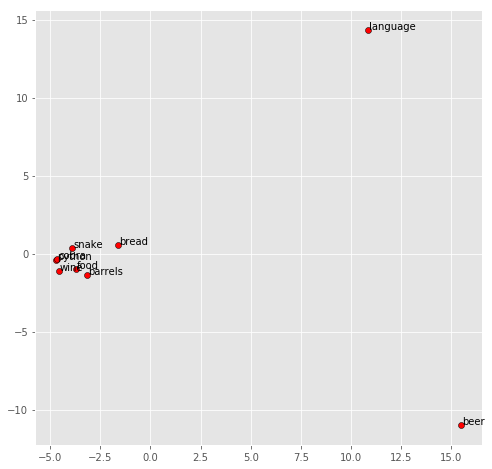

In [15]:
word_vectors, words = cooccurrence_vectors(word_list, news_word_ids, M)
visualize_vectors(words, word_vectors)

python [-2.54689418 12.3053275 ]
snake [-5.57911831 -0.93033756]
language [-6.26356517 -2.30787893]
cobra [-6.11620881 -1.58278289]
food [-6.5732845  -2.31259296]
bread [36.94829859 -0.94555299]
wine [-3.43322623 -1.81523704]
beer [-6.43600137 -2.41094513]


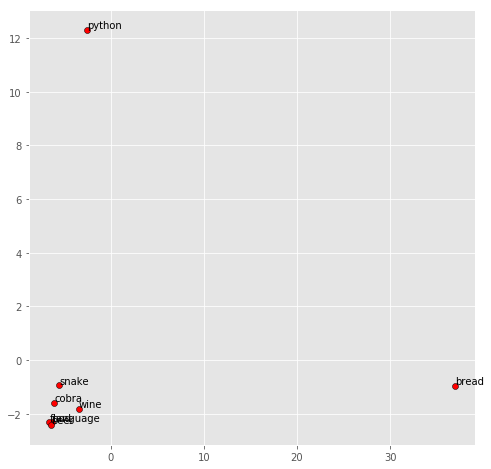

In [44]:
word_vectors, words = cooccurrence_vectors(word_list, hobbies_word_ids, M_hobbies)
visualize_vectors(words, word_vectors)

## 1.3 Word Embeddings
Perform the same analysis as before, extracting a slice of the matrix on the above list of words and
then plot them in two dimensions.

In [32]:
import gensim.downloader as api
from gensim.models import Word2Vec

glove = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [67]:
def show_word_vectors(word_list, embeddings, topn=10):
    word_vectors = []
    for word in word_list:
        print('The most similar words to word "%s":' % word)
        pairs = embeddings.most_similar(word, topn=topn)
        for pair in pairs: print(pair)
        word_vectors.append(embeddings[word])
    return word_vectors

In [68]:
glove_vectors = show_word_vectors(word_list, glove, topn=5)

The most similar words to word "python":
('monty', 0.6892720460891724)
('spamalot', 0.5611782073974609)
('cleese', 0.5454379320144653)
('php', 0.5255268812179565)
('pythons', 0.5076838731765747)
The most similar words to word "snake":
('snakes', 0.7275532484054565)
('lizard', 0.5701727867126465)
('frog', 0.5546317100524902)
('venomous', 0.5528967380523682)
('serpent', 0.5473936200141907)
The most similar words to word "language":
('languages', 0.7869358062744141)
('arabic', 0.6878665685653687)
('word', 0.6791515946388245)
('english', 0.6665443778038025)
('spoken', 0.6331455707550049)
The most similar words to word "cobra":
('ah-1', 0.560380756855011)
('ah-1w', 0.5121273994445801)
('mustang', 0.4854917526245117)
('starship', 0.47967591881752014)
('scorpion', 0.45530185103416443)
The most similar words to word "food":
('foods', 0.7071868181228638)
('supplies', 0.6728929877281189)
('products', 0.631743311882019)
('eating', 0.6229158639907837)
('eat', 0.6227812767028809)
The most similar w

python [ 5.06985766 -2.96844734]
snake [ 3.2573322  -0.35122668]
language [ 2.42679711 -0.98588501]
cobra [ 3.2493278  -1.91472367]
food [-0.23216499  2.55354723]
bread [0.95149093 3.72894731]
wine [0.28556279 4.38897573]
beer [0.73446383 3.80456319]
barrels [-3.40501899 -0.60631724]
oil [-4.1581424  -0.75179565]
energy [-2.82419362 -1.21934295]
kuwait [-1.38013925 -3.53524155]
revenues [-2.09236921 -1.22437846]
profits [-1.88280386 -0.9186749 ]


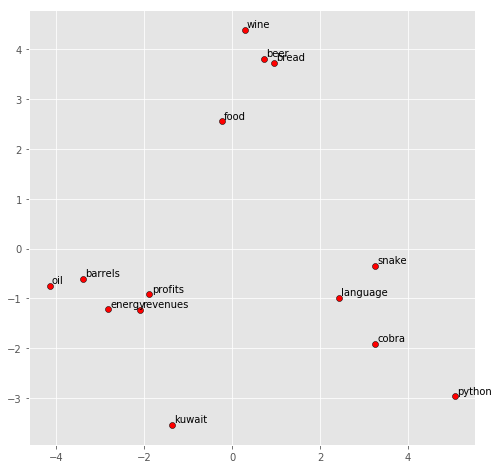

In [54]:
visualize_vectors(word_list, glove_vectors)

## 1.4 Synonyms & Antonyms
Find three words (w1,w2,w3) where w1 and w2 are synonyms and w1 and w3 are antonyms, but
Cosine Distance(w1,w3) < Cosine Distance(w1,w2).

For example, w1="happy" is closer to w3="sad" than to w2="cheerful".

In [59]:
word1 = 'happy'
word2 = 'cheerful'
word3 = 'sad'

print(word1, word3, glove.distance(word1, word3))
print(word1, word2, glove.distance(word1, word2))
print('cosine_distance(%s, %s) < cosine_distance(%s, %s) = %s' %
      (word1, word3, word1, word2, glove.distance(word1, word3) < glove.distance(word1, word2)))

happy sad 0.4040136933326721
happy cheerful 0.5172466933727264
cosine_distance(happy, sad) < cosine_distance(happy, cheerful) = True


In [60]:
word1 = 'bad'
word2 = 'evil'
word3 = 'good'

print(word1, word3, glove.distance(word1, word3))
print(word1, word2, glove.distance(word1, word2))
print('cosine_distance(%s, %s) < cosine_distance(%s, %s) = %s' %
      (word1, word3, word1, word2, glove.distance(word1, word3) < glove.distance(word1, word2)))

bad good 0.28903740644454956
bad evil 0.588481605052948
cosine_distance(bad, good) < cosine_distance(bad, evil) = True


# 2 Naïve Bayes Classifier
We will use the Movie Review dataset from https://www.kaggle.com/pankrzysiu/keras-imdb
It contains 50,000 highly polarized reviews, preprocessed, tokenized, indexed and stored into
numpy arrays.

In [2]:
num_words = 10000

from keras.datasets import imdb

In [3]:
# Fix for:
#    ValueError: Object arrays cannot be loaded when allow_pickle=False
# save np.load
import numpy as np
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [11]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_NUM_WORDS,
                                                     index_from=1)

## 2.1 Classifier

In [26]:
import numpy as np
from collections import defaultdict

class NBayesClassifier():
    
    def train(self, x_train, y_train):       
        # compute priors
        unique, counts = np.unique(y_train, return_counts=True)
        self.P_C = dict(zip(unique, np.log(counts / len(y_train))))
        
        class_counts = np.zeros(len(self.P_C))
        self.logprob = np.zeros((len(self.P_C), num_words))
        total_count = 0
        for doc, label in zip(x_train, y_train):
            for item in doc:
                self.logprob[label, item] += 1
                class_counts[label] += 1
        # turn counts into logprob
        for label in self.P_C:
            # add regularization and apply log()
            self.logprob[label] = np.log((self.logprob[label] + 1)/ (class_counts[label] + total_count))

    def predict(self, x_test):
        y_pred = np.zeros(len(x_test))
        for i, doc in enumerate(x_test):
            max_prob = -np.inf
            for label in self.P_C:
                logprob = self.P_C[label]
                for item in doc:
                    logprob += self.logprob[label, item]
                if logprob > max_prob:
                    max_prob = logprob
                    best_class = label
            y_pred[i] = best_class
        return y_pred

In [27]:
nb_classifier = NBayesClassifier()
nb_classifier.train(x_train, y_train)

## 2.2 Evaluation

In [28]:
def evaluate(y_test, y_pred):
    count = 0
    tp = 0
    fp = 0
    fn = 0
    for ti, pi in zip(y_test, y_pred):
        if ti == pi:
            count += 1
        if ti == 1 and pi == 1:
            tp += 1
        if ti == 0 and pi == 1:
            fp += 1
        if ti == 1 and pi == 0:
            fn += 1

    accuracy = (count / len(y_test)) * 100
    print('Accuracy: %.2f %%' % accuracy)
    precision = tp / (tp + fp)
    print('Precision:', precision)
    recall = tp / (tp + fn)
    print('Recall:', recall)
    print('F1:', (2*precision*recall) / (precision + recall))

In [29]:
y_pred = nb_classifier.predict(x_test)
evaluate(y_test, y_pred)

Accuracy: 81.60 %
Precision: 0.8510619390384786
Recall: 0.76616
F1: 0.8063823517029428


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82     12500
           1       0.85      0.77      0.81     12500

   micro avg       0.82      0.82      0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



# 3   Neural Network Classifier

## 3.1 Gradients

*Consider the following Neural Network:*
\begin{align}
𝐡 & = \tanh(𝑊𝐱+𝑏) \\
𝐲̂  & = softmax(𝑈𝐡+𝑑) \\
\end{align}
*with the cross-entropy loss function:*
\begin{equation}
J = - \sum_{i}y_i \log(𝐲̂ _i)
\end{equation}
*What is the gradient of $J$ with respect to $x$, $\delta J/\delta x$?*

*Hint: $\frac{\partial tanh(z)}{\partial z} = 1 – \tanh^2(z)$*

**Solution**

Let $w = Wx + b$ and $z = Uh + d$

\begin{align}
\frac{\partial J}{\partial x} &= \frac{\partial J}{\partial w} \frac{\partial w}{\partial x} = W \frac{\partial J}{\partial w} \\
\frac{\partial J}{\partial w} &= \frac{\partial J}{\partial h} \frac{\partial h}{\partial w} = \frac{\partial J}{\partial h} \circ (1 - \tanh^2(w)) \\
\frac{\partial J}{\partial h} &= \frac{\partial J}{\partial z} \frac{\partial z}{\partial h} = U \frac{\partial J}{\partial z} \\
\frac{\partial J}{\partial z} &= \hat{y} - y
\end{align}

The last derivative can be obtained as follows:
\begin{align}
\frac{\partial J}{\partial z_i} &= - \sum_{k}y_k \frac{\partial \log(\hat{y}_k)}{\partial z_i} \\
&= - \sum_{k}y_k \frac{\partial \log(\hat{y}_k)}{\partial \hat{y}_k} \frac{\partial \hat{y}_k}{\partial z_i} \\
&= - \sum_{k}y_k \frac{1}{\hat{y}_k} \frac{\partial \hat{y}_k}{\partial z_i} \\
\end{align}

Since $\hat{y}_i = softmax(z_i)$, and the derivative of $softmax$ is:
\begin{align}
\frac{\partial \hat{y}_i}{\partial z_i} &= \hat{y}_i (1 - \hat{y}_j)  & if & i=j \\
\frac{\partial \hat{y}_i}{\partial z_i} &= - \hat{y}_j \hat{y}_i      & if & i \neq j
\end{align}

considering separately the case $k = i$, we get:
\begin{align}
\frac{\partial J}{\partial z_i} &= - y_i(1 - \hat{y}_i) - \sum_{k \neq i}y_k \frac{1}{\hat{y}_k} (- \hat{y}_k \hat{y}_i) \\
&= - y_i(1 - \hat{y}_i) + \sum_{k \neq i}y_k \hat{y}_i \\
&= \hat{y}_i \left( y_i + \sum_{k \neq i}y_k \right) - y_i\\
&= \hat{y}_i - y_i\\
\end{align}
since $y$ is a one hot encoded vector for the labels, so:
\begin{align}
y_i + \sum_{k \neq i}y_k = 1
\end{align}

## 3.2 Classifier
*Build a NN binary classifier in Keras using the following layers:*
1. word embeddings
2. Convolutional Neural Network
3. Max Pooling
4. Dense

and a cross-entropy loss function.

### Load GloVE embeddings

In [16]:
glove = api.load("glove-wiki-gigaword-50")

In [38]:
glove.vectors.shape

(400000, 50)

## Load the word index of IMDB
We need the index of words for the IMDB, dowloaded from https://s3.amazonaws.com/text-datasets/imdb_word_index.json

In [39]:
word_index = imdb.get_word_index()

word_index['the'] should be 1, since 0 is reserved for padding.

### Pad sequences

In [41]:
MAX_SEQUENCE_LENGTH = 250
MAX_NUM_WORDS = 10000 # Top most frequent words to consider. Includes padding.
VALIDATION_SPLIT = 0.1
EPOCHS = 5
BATCH_SIZE = 64

In [42]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

### Split train data into train and validation:

In [65]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
data = x_train[indices]
labels = y_train[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((22500, 250), (22500,), (2500, 250), (2500,))

### Build embeddings corresponding to the IMDB word index

In [57]:
num_words = min(MAX_NUM_WORDS, len(word_index) + 1) # +1 for padding
# Initialize with random weights
word_embeddings = np.random.uniform(-0.2, 0.2, (num_words, glove.vectors.shape[1]))

for word, i in word_index.items():
    if i >= num_words:
        continue
    if word in glove:
        # words not found in embeddings will have random weights
        word_embeddings[i] = glove[word]

## Build the model

In [58]:
from keras.models import Model, Sequential
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten
from keras.layers import Dropout, Dense
from keras.losses import binary_crossentropy, categorical_crossentropy

In [59]:
model = Sequential()
model.add(Embedding(word_embeddings.shape[0],
              word_embeddings.shape[1],
              weights=[word_embeddings],
              input_length=MAX_SEQUENCE_LENGTH))

A `Conv1D` with `kernel_size=5` builds a convolution over time of windows of size 5, and `MaxPooling1D` collapses each group of consecutive 5 into a single vector. 

In [61]:
HIDDEN_SIZE = 128

model.add(Conv1D(HIDDEN_SIZE, 5, padding='same', activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(HIDDEN_SIZE, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

### Show the model

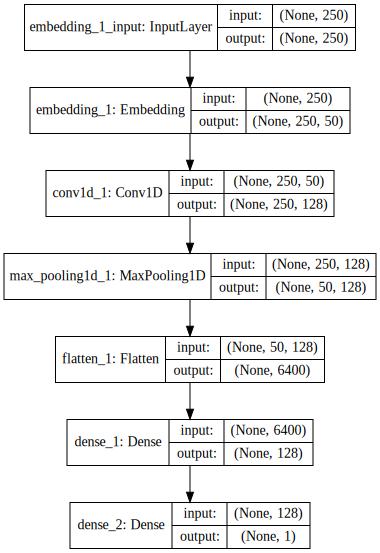

In [62]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Compile
`Keras` is built on top of `Theano` and `TensorFlow`. Both packages allow you to define a computation graph in `Python`, which is then compiled and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

The `compile` method takes three arguments:
- A loss function. The objective that the model will try to minimize. It can be the name of an existing loss function (such as `categorical_crossentropy` or ` mse`), or it can be an objective function.
- An optimizer. The name of an existing optimizer (such as `rmsprop` or `adagrad`), or an instance of the Optimizer class.
- A list of metrics. For any classification problem you will want to set this to `metrics=['accuracy']`. A metric could be the name of an existing metric or a custom metric function.

In [63]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

## Train the model

*Train the classifier on the Movie Review dataset, using fold 10 for testing and the rest for training.*

In [66]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,  # default 32
          epochs=EPOCHS,
          validation_data=(x_val, y_val),
          verbose=True)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 16s 712us/step - loss: 0.7113 - acc: 0.5079 - val_loss: 0.6912 - val_acc: 0.5144
Epoch 2/5
22500/22500 [==============================] - 16s 696us/step - loss: 0.6268 - acc: 0.6669 - val_loss: 0.5472 - val_acc: 0.7840
Epoch 3/5
22500/22500 [==============================] - 16s 697us/step - loss: 0.4315 - acc: 0.8556 - val_loss: 0.3570 - val_acc: 0.8492
Epoch 4/5
22500/22500 [==============================] - 16s 694us/step - loss: 0.2296 - acc: 0.9118 - val_loss: 0.3588 - val_acc: 0.8536
Epoch 5/5
22500/22500 [==============================] - 16s 697us/step - loss: 0.1327 - acc: 0.9533 - val_loss: 0.3591 - val_acc: 0.8696


## 3.3 Evaluate the NN classifier

*Compare the accuracy and F1 wrt the Naïve Bayes classifier.*

In [67]:
y_pred = model.predict(x_test)
y_pred = [int(y > 0.5) for y in y_pred]

In [68]:
from sklearn.metrics import confusion_matrix

def show_metrics(y_test, y_pred):
    """
    Print metrics comparing :param y_test: with :param y_pred:.
    """
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)

    print("Accuracy: %.2f; Precision: %.2f; Recall: %.2f; F1: %.2f" %
          (accuracy*100, precision*100, recall*100, f1*100))

In [69]:
show_metrics(y_test, y_pred)

Accuracy: 85.32; Precision: 85.12; Recall: 85.60; F1: 85.36


# 4 POS	Tagger
Get the tokenized and tagged with Universal POS sentences from the "news" category from the
Brown corpus:

In [7]:
from nltk.corpus import brown
brown_sents = brown.tagged_sents(categories='news', tagset='universal')

## 4.1 Classifier
Adapt the previous classifier to a multiclass classifier to predict the POS tag of each word. Use a
sliding window, i.e. represent each word by the concatenation of the embeddings of 5 words, i.e. the
word, two preceding and two following words. Add a special padding word to the embeddings to
represent words close to the beginning or end of a sentence

### Split into train and test
Use all but the last 1000 sentences to train the classifier. (It should be better to choose them randomly).

In [8]:
brown_train = brown_sents[:-1000]
brown_test = brown_sents[-1000:]

### Build dictionary of words and tags

Vocabularies of words and tags:

In [9]:
word_set = set()
tag_set = set()
for sentence in brown_sents:
    for word, tag in sentence:
        word_set.add(word)
        tag_set.add(tag)

Dictionaries of words and tags:

In [10]:
word_index = {}
for idx, word in enumerate(word_set):
    word_index[word] = idx + 2 # leave 0 and 1 for padding and unknown
    
tag_index = {}
int2tag = {}
for idx, tag in enumerate(tag_set):
    tag_index[tag] = idx
    int2tag[idx] = tag

n_words = len(word_index) + 2 # for padding and OOV
n_tags = len(tag_set)

We represent each word as an n-gram of a few tokens around the word.

In [11]:
import numpy as np

def build_ngrams(sentences, ctx_size, word_index, tag_index):
    """
    Turn sentences into n-grams of word indices, taken from word_index.
    :param setences: a list of sentences.
    :param ctx_size: numer of tokens to consider before and after each word.
    :param word_index: dictionary of words.
    :param tag_index: dictionary of tags.
    :return: the list of n-grams and the list of corresponding labels.
    """
    padding_idx = 0
    unknown_idx = 1
    
    X = []
    Y = []
    
    for sentence in sentences:
        for n, (word, tag) in enumerate(sentence):
            word_indices = []
            for i in range(n - ctx_size, n + ctx_size + 1):
                # add padding
                if i < 0 or i >= len(sentence):
                    word_indices.append(padding_idx)
                    continue
                gram = sentence[i][0]
                # index of either word, lowercase word or unknown
                word_idx = word_index.get(gram) or word_index.get(gram.lower(),
                                                                  unknown_idx)
                word_indices.append(word_idx)

            X.append(word_indices)
            Y.append(tag_index[tag])
            
    return np.asarray(X), np.asarray(Y)                    

### Build the data set of n-grams

In [12]:
ctx_size = 2
window_size = 2 * ctx_size + 1
x_train, y_train = build_ngrams(brown_train, ctx_size, word_index, tag_index)
x_test, y_test = build_ngrams(brown_test, ctx_size, word_index, tag_index)

Turn tags into a one-hot representation:

In [14]:
from keras.utils import to_categorical
to_categorical?

Signature: to_categorical(y, num_classes=None)
Docstring:
Converts a class vector (integers) to binary class matrix.

E.g. for use with categorical_crossentropy.

# Arguments
    y: class vector to be converted into a matrix
        (integers from 0 to num_classes).
    num_classes: total number of classes.

# Returns
    A binary matrix representation of the input.
File:      /usr/local/lib/python3.6/dist-packages/keras/utils/np_utils.py
Type:      function


Convert outputs to one-hot vectors, so that the classifier will produce a probability distribution for each tag: 

In [15]:
y_train_cat = to_categorical(y_train, num_classes=n_tags)
y_test_cat = to_categorical(y_test, num_classes=n_tags)

In [16]:
x_train.shape, y_train_cat.shape, x_test.shape, y_test_cat.shape

((77552, 5), (77552, 12), (23002, 5), (23002, 12))

See one result in categorical form:

In [17]:
y_train[0], y_train_cat[0]

(6, array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]))

### Build the model

In [18]:
from keras.models import Model, Sequential
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten
from keras.layers import Dropout, Dense
from keras.losses import binary_crossentropy, categorical_crossentropy

Hyperparameters

In [19]:
MAX_SEQUENCE_LENGTH = 250
HIDDEN_SIZE = 128
EMBEDDING_DIM = 50
EPOCHS = 4
BATCH_SIZE = 64

In [20]:
model = Sequential()
model.add(Embedding(n_words, EMBEDDING_DIM, input_length=window_size))
model.add(Flatten())
model.add(Dropout(0.2)) # optional
model.add(Dense(HIDDEN_SIZE, activation='relu'))
model.add(Dropout(0.2)) # optional
model.add(Dense(n_tags, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

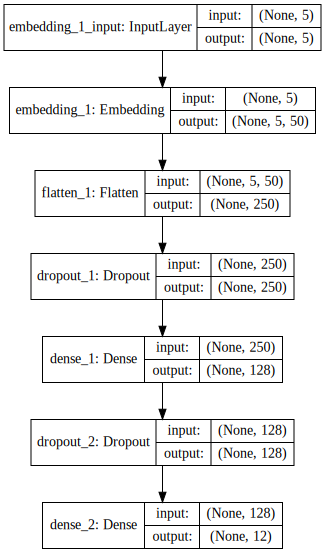

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Train the model

In [22]:
history = model.fit(x_train, y_train_cat, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/4
77552/77552 [==============================] - 14s 177us/step - loss: 0.5266 - acc: 0.8459
Epoch 2/4
77552/77552 [==============================] - 14s 176us/step - loss: 0.0952 - acc: 0.9715
Epoch 3/4
77552/77552 [==============================] - 14s 176us/step - loss: 0.0411 - acc: 0.9874
Epoch 4/4
77552/77552 [==============================] - 14s 175us/step - loss: 0.0242 - acc: 0.9929


### Evaluate the tagger
`predict_classes` returns the `argmax` of the predicted `softmax` scores.

In [23]:
y_pred = model.predict_classes(x_test)

This is equivalent of calling `predict` to obtain a probability distribution and then taking the `argmax`:

In [24]:
y_pred_cat = model.predict(x_test)
y_pred == y_pred_cat.argmax(1)

array([ True,  True,  True, ...,  True,  True,  True])

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def show_micro_avg(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred) * 100
    pr = precision_score(y_test, y_pred, average='micro') * 100
    rc = recall_score(y_test, y_pred, average='micro') * 100
    f1 = f1_score(y_test, y_pred, average='micro') * 100
    print("Accuracy: %.2f, Precision: %.2f, Recall: %.2f, F1: %.2f" %
          (acc, pr, rc, f1))

In [26]:
show_micro_avg(y_test, y_pred)

Accuracy: 93.39, Precision: 93.39, Recall: 93.39, F1: 93.39


### Show the confusion matrix

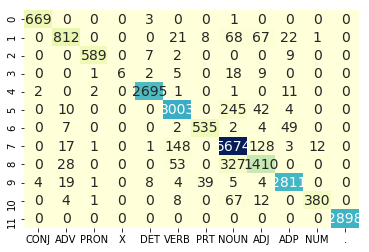

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
%matplotlib inline

df = pd.DataFrame(cm, columns=tag_set)
sn.heatmap(df, annot=True, cbar=False, fmt="d", cmap="YlGnBu", annot_kws={"size": 14})# font size